In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
# plt.style.use('seaborn') #引入seaborn的风格
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = ['SimHei']
%config InlineBackend.figure_format='svg'#矢量图设置

from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
import gc

## 一 将数据读入

In [2]:
df_scan = pd.read_csv('./data/Loan_status_2007-2020Q3.gzip', low_memory=False,index_col=0)  #只读100000行  nrows=500000
df_scan

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,Senior Escrow Officer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,Rn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
105448,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,Sales Associate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,Contact input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


### 1修改列名

In [3]:
columns_english_name = df_scan.columns
columns_english_name

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_length', 'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag'],
      dtype='object', length=141)

In [4]:
col_name = pd.read_excel("./data/LCDataDictionary.xlsx")
col_name.iloc[:50,:]

,字段英文名,字段中文名,描述
0,acc_now_delinq,逾期账户数量,借款人逾期账户数量
1,acc_open_past_24mths,过去2年内开立的交易账户数量,过去 24 个月内开立的交易数量。
2,addr_state,借款人在贷款申请中提供的状态,借款人在贷款申请中提供的状态
3,all_util,所有交易的信用额度余额,所有交易的信用额度余额
4,annual_inc,年收入,借款人在注册时提供的自报年收入。
5,annual_inc_joint,共同借款人在登记期间提供的合并年收入,共同借款人在登记期间提供的合并自报年收入
6,application_type,申请类型,表明贷款是个人申请还是与两个共同借款人联合申请
7,avg_cur_bal,所有账户的平均当前余额,所有账户的平均当前余额
8,bc_open_to_buy,循环银行卡上的总开放购买,循环银行卡上的总开放购买。
9,bc_util,所有银行卡账户的当前总余额与高信用/信用额度的比率,所有银行卡账户的当前总余额与高信用/信用额度的比率。


In [5]:
print(len(columns_english_name))
print(len(col_name.loc[:,["字段英文名","字段中文名"]]))
print(col_name.loc[:,["字段英文名","字段中文名"]].loc[0,"字段中文名"])
type(col_name.loc[:,["字段英文名","字段中文名"]].loc[0,"字段中文名"])

141
152
逾期账户数量


str

In [6]:
def change_df_columns_name(col_name,columns_english_name):
  chiness_name_df = col_name.loc[:,["字段英文名","字段中文名"]]
  n = len(chiness_name_df)
  alist = []
  for i in range(len(columns_english_name)):
    #依次得到原DF的columns的列名
    val = columns_english_name[i]
    success = 0
    for j in range(n):
      if chiness_name_df.loc[j,"字段英文名"] == val:
        alist.append(chiness_name_df.loc[j,"字段中文名"])
        break  #赋值结束跳出循环
      else:
        success += 1
    if success == len(chiness_name_df):
      # 没有找到对应的中文名，已遍历完毕中文名的可选性，将英文名放回
      alist.append(val)

        
  if len(columns_english_name) == len(alist):
    return alist
  else:
    return len(alist)

In [7]:
chinesee_name = change_df_columns_name(col_name,columns_english_name)
df_scan.columns = chinesee_name
chinesee_name

['贷款ID',
 '申请的贷款金额',
 '在该时间点承诺用于该贷款的总金额',
 '投资者在该时间点为该贷款承诺的总金额',
 '贷款周期',
 '贷款利率',
 '分期金额',
 '授信评级',
 '子评级',
 '职位',
 '就业年限',
 '房产权',
 '年收入',
 '收入来源是否已核实',
 '贷款融资的月份',
 '贷款现状',
 '是否制定还款计划',
 '网址',
 '贷款目的',
 '贷款名称',
 '借款人邮政编码前3个数字',
 '借款人在贷款申请中提供的状态',
 '债务收入比',
 '过去2年借款人信用档案中逾期30天以上的逾期发生次数',
 '借款人最早报告的信用额度开立的月份',
 '借款人在贷款发起时FICO所给评级下限',
 '借款人在贷款发起时FICO所给评级上限',
 '过去6个月的查询次数（不包括汽车和抵押贷款查询）',
 '自借款人上次拖欠以来的月数',
 '自上次公开记录以来的月数',
 '征信记录中的信贷笔数',
 '诽谤性公共记录次数',
 '信贷循环余额总额',
 '循环额度利用率',
 '借款人信用档案中当前的信用额度总数',
 '贷款初始状态',
 '剩余未偿还本金总额',
 '投资者出资总额的部分剩余未偿还本金',
 '至今偿还总额',
 '至今偿还的直接融资金额',
 '迄今为止收到的本金',
 '至今缴纳利息',
 '至今缴纳滞纳金',
 '冲销后回收金额',
 '征收回收费',
 '已收到上个月付款',
 '最后收到的总付款金额',
 '下一个预定付款日期',
 '最近一个月LC取消了这笔贷款的信贷',
 '借款人最后一次提取FICO所给评级上限',
 '借款人最后一次提取FICO所给评级下限',
 '1年内的收款数量',
 '最近90天或更差评级至今月数',
 '政策代码',
 '申请类型',
 '共同借款人在登记期间提供的合并年收入',
 '（含共同借款人）债务收入比',
 '共同借款人的共同收入核实状况',
 '逾期账户数量',
 '总收款金额',
 '所有账户的当前总余额',
 '公开交易笔数(过去半年)',
 '当前活跃的分期交易数量',
 '分期付款数(1年内)',
 '过去2年内开设的分期付款账户数目',
 '最近的分期付款账户开立至今月数',
 '所有分期账户的当前总余额',
 '

In [8]:
print(df_scan.info())
df_scan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925493 entries, 0 to 105450
Columns: 141 entries, 贷款ID to 标记已注销的借款人是否与债务清偿公司合作
dtypes: float64(106), object(35)
memory usage: 3.1+ GB
None


,贷款ID,申请的贷款金额,在该时间点承诺用于该贷款的总金额,投资者在该时间点为该贷款承诺的总金额,贷款周期,贷款利率,分期金额,授信评级,子评级,职位,...,困难计划期的开始日期,困难计划期的结束日期,第一次困难计划到期付款日,由于困难计划，借款人将支付比正常义务少的还款月数,截至困难计划开始日期的逾期账户天数,截至困难计划开始日期的贷款状态,截至困难开始日期，给定困难付款计划将产生的原始预计额外利息金额,截至困难计划开始日期的支付余额,截至困难计划开始日期的最后一笔付款金额,标记已注销的借款人是否与债务清偿公司合作
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,Senior Escrow Officer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,Rn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
105448,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,Sales Associate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,Contact input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [9]:
len(df_scan["贷款ID"].unique())

2925493

### 2查看df_scan各列缺失值的状况

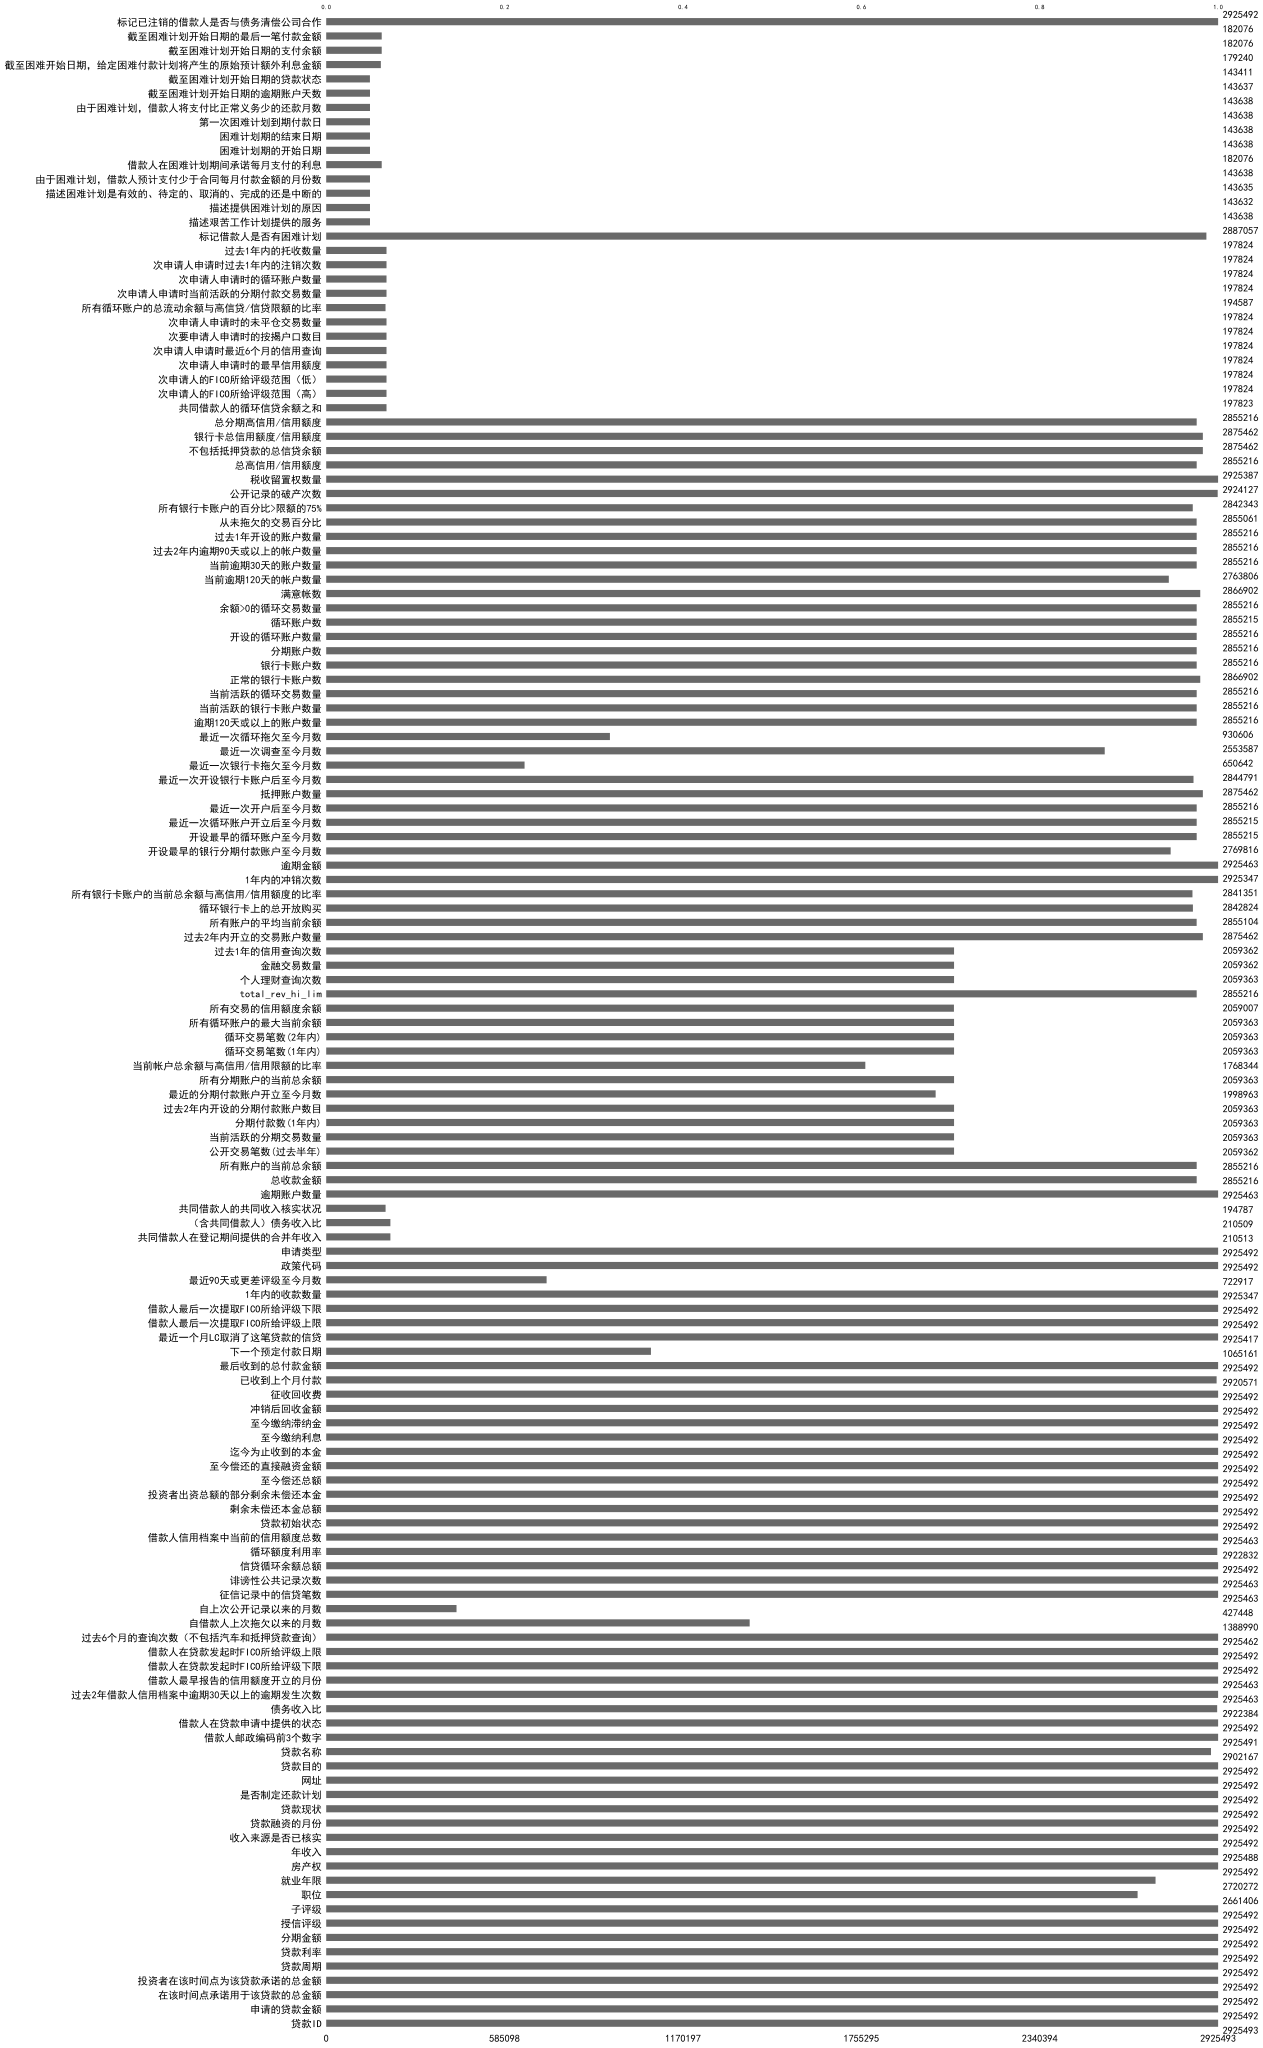

In [10]:
import missingno as msno
plt.figure(figsize=(10,10))
msno.bar(df_scan)
plt.show()

In [11]:
a = df_scan.isnull().sum()    #查看各列的缺失状况
print(a)

贷款ID                                     0
申请的贷款金额                                  1
在该时间点承诺用于该贷款的总金额                         1
投资者在该时间点为该贷款承诺的总金额                       1
贷款周期                                     1
                                    ...   
截至困难计划开始日期的贷款状态                    2782082
截至困难开始日期，给定困难付款计划将产生的原始预计额外利息金额    2746253
截至困难计划开始日期的支付余额                    2743417
截至困难计划开始日期的最后一笔付款金额                2743417
标记已注销的借款人是否与债务清偿公司合作                     1
Length: 141, dtype: int64


### 2查看label列

In [12]:
## 看一下分布
df_scan["贷款现状"].value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: 贷款现状, dtype: int64

## 二label只保留还清或提记损失的用户

In [13]:
df_scan['是否还款'] = df_scan["贷款现状"].map({'Fully Paid':1,'Charged Off':0})
df_scan[['贷款现状', '是否还款']].head(10)

,贷款现状,是否还款
0,Fully Paid,1.0
1,Charged Off,0.0
2,Fully Paid,1.0
3,Fully Paid,1.0
4,Fully Paid,1.0
5,Fully Paid,1.0
6,Fully Paid,1.0
7,Fully Paid,1.0
8,Charged Off,0.0
9,Charged Off,0.0


In [14]:
df = df_scan[df_scan["是否还款"].isin([0,1])]
df

#将df_scan删除，处理内存
import gc
del df_scan
gc.collect()

39843

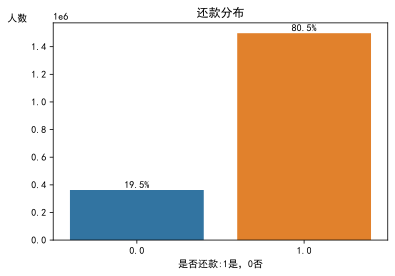

In [15]:
ax = sns.countplot(data = df, x = '是否还款')
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('还款分布')
plt.ylabel("人数",rotation=360,loc="top")
plt.xlabel("是否还款:1是，0否")
plt.show()

In [16]:
df

,贷款ID,申请的贷款金额,在该时间点承诺用于该贷款的总金额,投资者在该时间点为该贷款承诺的总金额,贷款周期,贷款利率,分期金额,授信评级,子评级,职位,...,困难计划期的结束日期,第一次困难计划到期付款日,由于困难计划，借款人将支付比正常义务少的还款月数,截至困难计划开始日期的逾期账户天数,截至困难计划开始日期的贷款状态,截至困难开始日期，给定困难付款计划将产生的原始预计额外利息金额,截至困难计划开始日期的支付余额,截至困难计划开始日期的最后一笔付款金额,标记已注销的借款人是否与债务清偿公司合作,是否还款
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1.0
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1.0
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1.0
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,Senior Escrow Officer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0
105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,Rn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1.0
105448,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,Sales Associate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0
105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,Contact input,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,1.0


### 1查看各特征的缺失值

In [17]:
df_null = df.isnull().sum()    #查看各列的缺失状况
print(df_null)

贷款ID                                     0
申请的贷款金额                                  0
在该时间点承诺用于该贷款的总金额                         0
投资者在该时间点为该贷款承诺的总金额                       0
贷款周期                                     0
                                    ...   
截至困难开始日期，给定困难付款计划将产生的原始预计额外利息金额    1841118
截至困难计划开始日期的支付余额                    1838282
截至困难计划开始日期的最后一笔付款金额                1838282
标记已注销的借款人是否与债务清偿公司合作                     0
是否还款                                     0
Length: 142, dtype: int64


In [18]:
df_null = pd.DataFrame(df_null,columns=["该列缺失值个数"])
df_null_show = df_null.loc[~df_null["该列缺失值个数"].isin([0])].sort_values(by="该列缺失值个数",ascending=False)

In [19]:
print(len(df_null_show.index))
print(df_null_show["该列缺失值个数"].dtype)
df_null_show["该列缺失值个数"].to_list()[0:3]

97
int64


[1860331, 1847647, 1847636]

In [20]:
from pyecharts.charts import Bar
from pyecharts import options as opts
x=df_null_show.index.tolist()
y=df_null_show["该列缺失值个数"].tolist()


# 两分类 1数字
from pyecharts.charts import Bar
from pyecharts import options as opts
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType

# bar = (
#     Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
#     .add_xaxis(x)
#     .add_yaxis("商家A",y)
#     # .add_yaxis("商家B", [15, 6, 45, 20, 35, 66])
#     .set_global_opts(title_opts=opts.TitleOpts(title="主标题", subtitle="副标题"))
# )
# bar.render_notebook()


bar = Bar()
bar.add_xaxis(list(x))
bar.add_yaxis("该列缺失值个数", y)
bar.set_global_opts(title_opts=opts.TitleOpts(subtitle="ssssss"),datazoom_opts=opts.DataZoomOpts(is_show=False))#去掉bar的数字标识
bar.render_notebook()

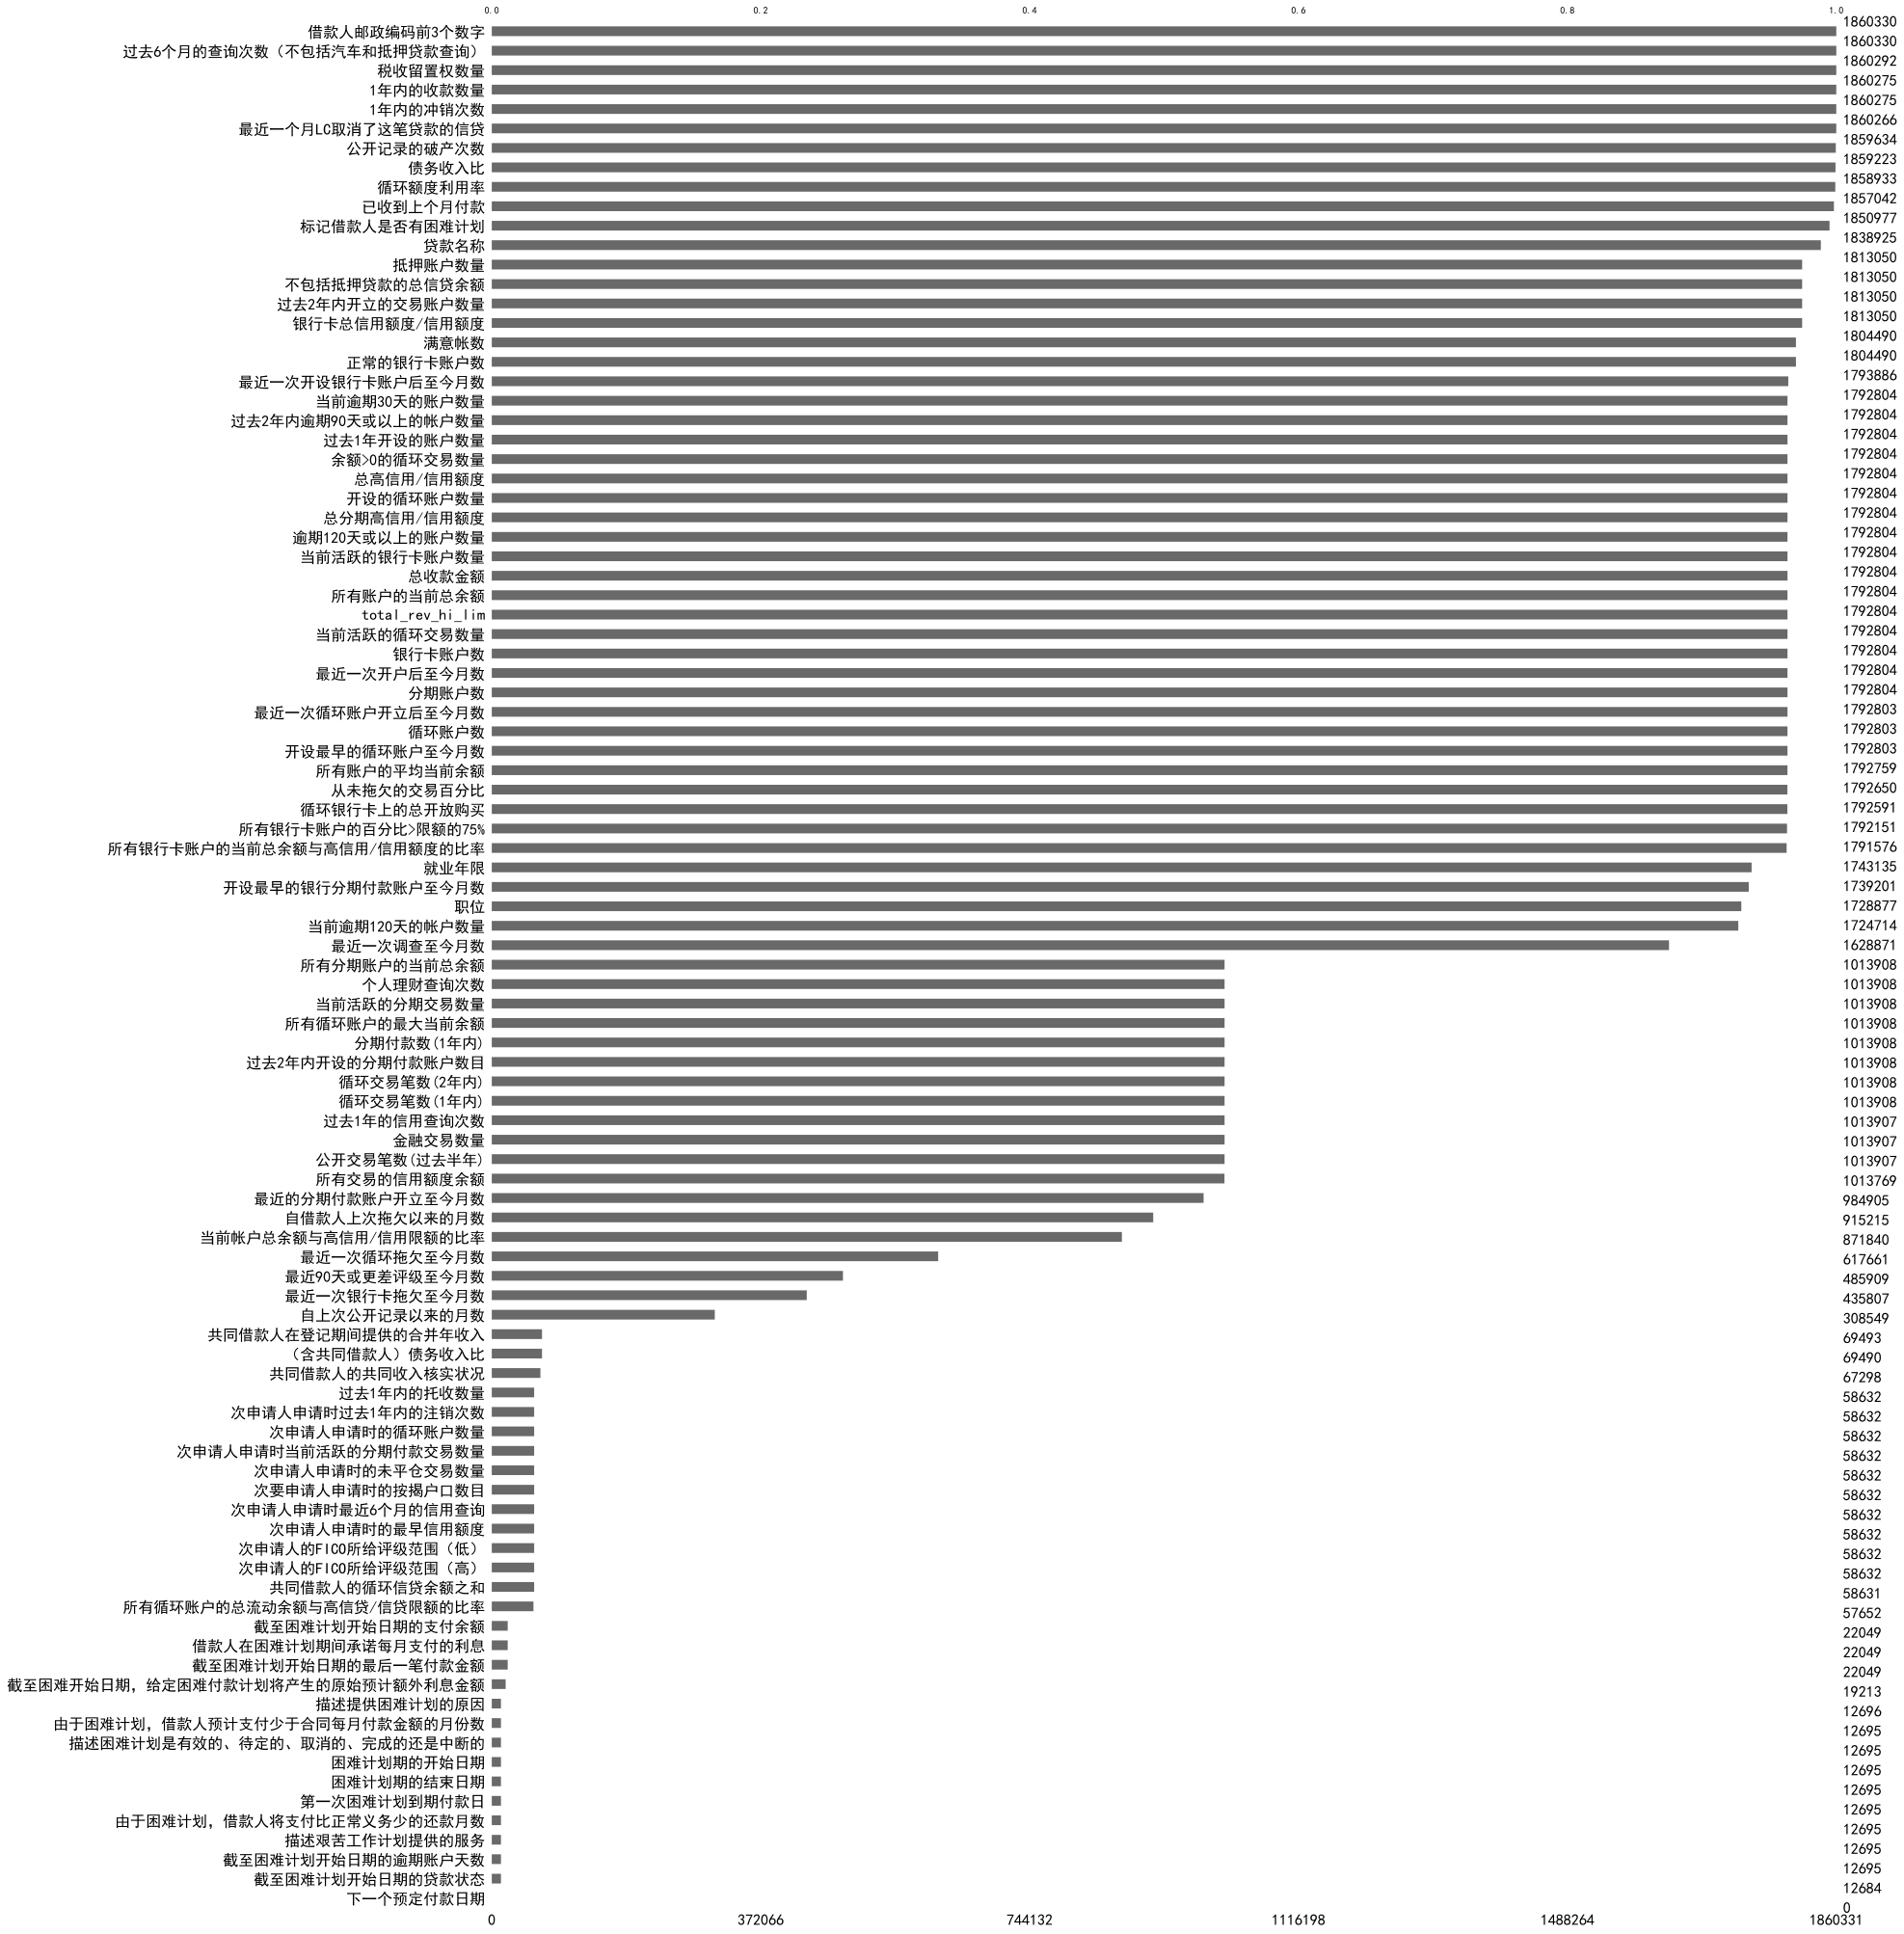

In [21]:
import missingno as msno
plt.figure(figsize=(10,10))
msno.bar(df.loc[:,df_null_show.index.tolist()])
plt.show()


### 2查看label列与其他列的相关性

In [22]:
# corr_df1 = df.corr(method='pearson')['是否还款'].sort_values(ascending=False).dropna()
# corr_df2 = df.corr(method='spearman')['是否还款'].sort_values(ascending=False).dropna()
# 将corr_df1,corr_df2持久化
# corr_df1.to_excel("./output/corr_df1.xlsx")
# corr_df2.to_excel("./output/corr_df2.xlsx")

In [23]:
corr_df1 = pd.read_excel("./output/corr_df1.xlsx")
corr_df2 = pd.read_excel("./output/corr_df2.xlsx")

### 3依据相关性分析构造特征

In [24]:
print(df["截至困难计划开始日期的最后一笔付款金额"].value_counts())
print(df["截至困难计划开始日期的支付余额"].value_counts())
print(df["截至困难计划开始日期的逾期账户天数"].value_counts())
print(df["由于困难计划，借款人预计支付少于合同每月付款金额的月份数"].value_counts())
print(df["（含共同借款人）债务收入比"].value_counts())
print(df["次申请人的FICO所给评级范围（低）"].value_counts())
print(df["次申请人的FICO所给评级范围（高）"].value_counts())


#保留的高相关性特征
# 截至困难计划开始日期的最后一笔付款金额
# 由于困难计划，借款人预计支付少于合同每月付款金额的月份数

# （含共同借款人）债务收入比
# 次申请人的FICO所给评级范围（低）
# 次申请人的FICO所给评级范围（高）

50.00       66
0.00        44
100.00      38
0.02        25
0.05        22
            ..
10758.32     1
309.79       1
293.18       1
596.50       1
209.60       1
Name: 截至困难计划开始日期的最后一笔付款金额, Length: 18193, dtype: int64
0.00        10488
10747.75        2
1797.18         2
8237.68         2
4229.09         2
            ...  
6881.46         1
13463.02        1
12742.91        1
16154.46        1
13361.83        1
Name: 截至困难计划开始日期的支付余额, Length: 11531, dtype: int64
0.0     3645
26.0     444
25.0     444
23.0     423
11.0     410
16.0     407
20.0     396
22.0     389
17.0     380
28.0     377
19.0     373
18.0     366
27.0     363
21.0     362
13.0     358
24.0     351
7.0      349
15.0     343
12.0     328
9.0      305
10.0     302
14.0     300
8.0      244
29.0     239
5.0      183
6.0      168
3.0      130
4.0      103
1.0       86
2.0       79
30.0      32
32.0       6
33.0       4
31.0       3
38.0       1
34.0       1
37.0       1
Name: 截至困难计划开始日期的逾期账户天数, dtype: int64
3.0    10825

In [25]:
def func_is_null(x):
  # 判断是否有困难计划/共同借款人  null：0   非null：1
  if pd.isnull(x):
    return 0
  else:
    return 1

In [26]:
df.loc[:,"是否有困难计划"] = df["截至困难计划开始日期的最后一笔付款金额"].apply(func_is_null)
df.loc[:,"是否有共同借款人"] = df["（含共同借款人）债务收入比"].apply(func_is_null)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [27]:
df.loc[:,['是否有困难计划','是否有共同借款人',"是否还款"]].corr(method='pearson')['是否还款'].sort_values(ascending=False).dropna()
df.loc[:,['是否有困难计划','是否有共同借款人',"是否还款"]].corr(method='spearman')['是否还款'].sort_values(ascending=False).dropna()

是否还款        1.000000
是否有共同借款人   -0.025524
是否有困难计划    -0.064328
Name: 是否还款, dtype: float64

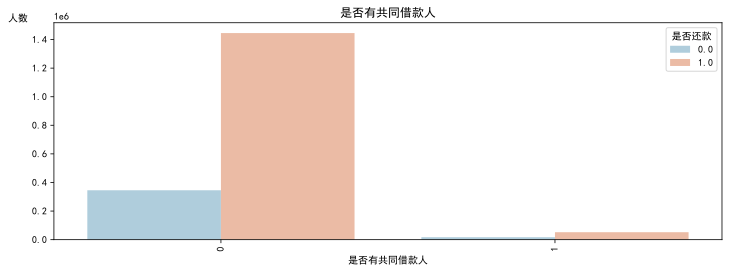

In [28]:
## 画图
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['是否有共同借款人'].unique())
sns.countplot(x='是否有共同借款人',data=df,order = subgrade_order,palette='RdBu_r',hue="是否还款")
plt.title('是否有共同借款人')

# plt.title('贷款金额分布')
plt.ylabel("人数",rotation=360,loc="top")
plt.xticks(rotation=90)
plt.show()

#### 保留缺失值多的高相关性特征

In [29]:
#保留的高相关性特征
# 截至困难计划开始日期的最后一笔付款金额
# 由于困难计划，借款人预计支付少于合同每月付款金额的月份数
# （含共同借款人）债务收入比
# 次申请人的FICO所给评级范围（低）
# 次申请人的FICO所给评级范围（高）
df["截至困难计划开始日期的最后一笔付款金额"].fillna(value=0,inplace=True)
df["由于困难计划，借款人预计支付少于合同每月付款金额的月份数"].fillna(value=0,inplace=True)
df["（含共同借款人）债务收入比"].fillna(value=0,inplace=True)
df["次申请人的FICO所给评级范围（低）"].fillna(value=0,inplace=True)
df["次申请人的FICO所给评级范围（高）"].fillna(value=0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### 4继续筛选剩下的特征

In [30]:
print(df.dtypes.head(50))

贷款ID                           object
申请的贷款金额                       float64
在该时间点承诺用于该贷款的总金额              float64
投资者在该时间点为该贷款承诺的总金额            float64
贷款周期                           object
贷款利率                           object
分期金额                          float64
授信评级                           object
子评级                            object
职位                             object
就业年限                           object
房产权                            object
年收入                           float64
收入来源是否已核实                      object
贷款融资的月份                        object
贷款现状                           object
是否制定还款计划                       object
网址                             object
贷款目的                           object
贷款名称                           object
借款人邮政编码前3个数字                   object
借款人在贷款申请中提供的状态                 object
债务收入比                         float64
过去2年借款人信用档案中逾期30天以上的逾期发生次数    float64
借款人最早报告的信用额度开立的月份              object
借款人在贷款发起时FICO所给评级下限           float64
借款人在贷款发起时FIC

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


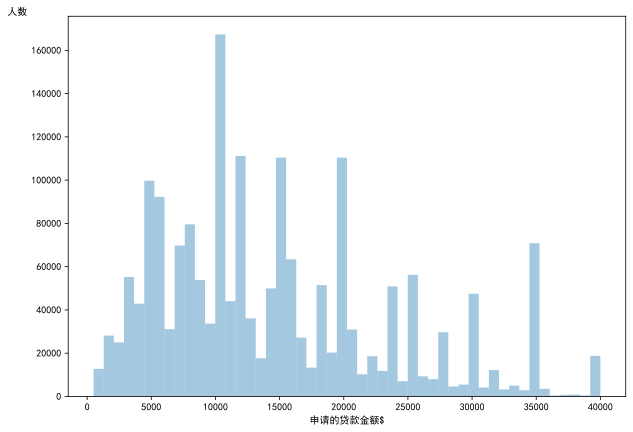

In [31]:
import statistics as stats
plt.figure(figsize=(10, 7))
sns.distplot(df["申请的贷款金额"], kde=False, bins=50)
# plt.title('贷款金额分布')
plt.ylabel("人数",rotation=360,loc="top")
plt.xlabel("申请的贷款金额$")
plt.show()

In [32]:
pd.set_option('display.float_format',lambda x:'%.2f' % x)
df["申请的贷款金额"].describe()

count   1860331.00
mean      14588.27
std        8970.47
min         500.00
25%        7950.00
50%       12000.00
75%       20000.00
max       40000.00
Name: 申请的贷款金额, dtype: float64

### 5子评级

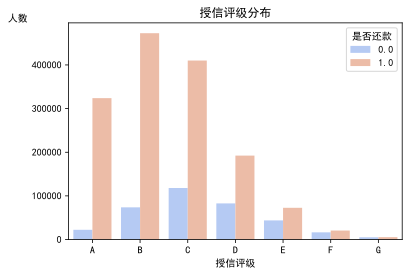

In [33]:
plt.figure(figsize=(6,4))
subgrade_order = sorted(df['授信评级'].unique())
sns.countplot(x='授信评级',data=df,order = subgrade_order,palette='coolwarm',hue="是否还款")
plt.title('授信评级分布')
plt.ylabel("人数",rotation=360,loc="top")
# plt.xlabel("申请的贷款金额$")
plt.show()

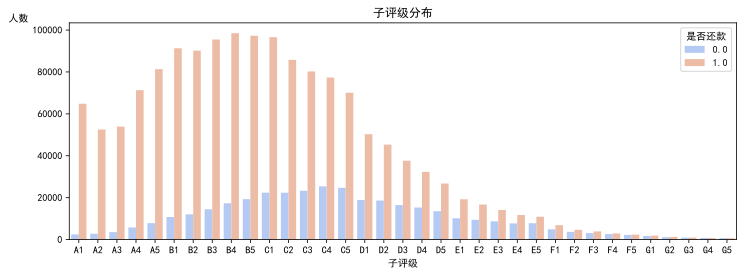

In [34]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['子评级'].unique())
sns.countplot(x='子评级',data=df,order = subgrade_order,palette='coolwarm',hue="是否还款")
plt.title('子评级分布')

# plt.title('贷款金额分布')
plt.ylabel("人数",rotation=360,loc="top")
# plt.xlabel("申请的贷款金额$")
plt.show()

In [35]:
def func_subgrade_generate():
  #生成子评级对应的连续列表
  adf = pd.read_excel("./data/子评级.xlsx")
  adict = adf.to_dict()["grade"]
  bdict = {}
  for key,val in adict.items():
    bdict[val] = key+1
  return bdict

<ipython-input-36-5a8c93f6e67e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['子评级(连续)'] = df['子评级'].map(adict)


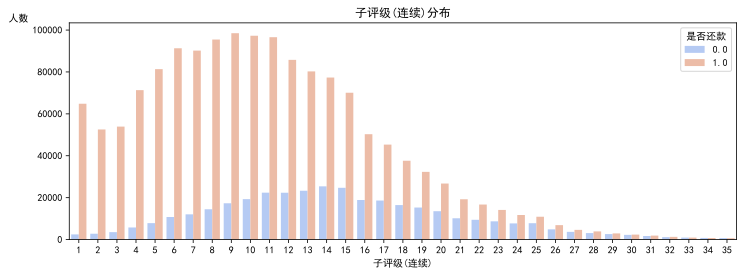

In [36]:
#构造特征
adict = func_subgrade_generate()
df['子评级(连续)'] = df['子评级'].map(adict)

## 画图
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['子评级(连续)'].unique())
sns.countplot(x='子评级(连续)',data=df,order = subgrade_order,palette='coolwarm',hue="是否还款")
plt.title('子评级(连续)分布')

# plt.title('贷款金额分布')
plt.ylabel("人数",rotation=360,loc="top")
# plt.xlabel("申请的贷款金额$")
plt.show()

In [37]:
df.drop(['子评级',"授信评级"],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 6职位

In [38]:
df["职位"].isnull().sum()

131454

In [39]:
print(len(df))
df["职位"].notnull().sum()

1860331


1728877

In [40]:
df["职位"].isna().sum()

131454

In [41]:
df.loc[:,"职位"]=df["职位"].fillna("lose_info")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [42]:
df["职位"] = df["职位"].astype("str")
df["职位"] = df["职位"].str.lower()

<ipython-input-42-ef37d7bcb37b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["职位"] = df["职位"].astype("str")
<ipython-input-42-ef37d7bcb37b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["职位"] = df["职位"].str.lower()


In [43]:
df["职位"].dtype

dtype('O')

In [44]:
len(df["职位"].value_counts())

391505

In [45]:
remain_job_list = df["职位"].value_counts().head(20).index.tolist()
remain_job_list

['lose_info',
 'teacher',
 'manager',
 'owner',
 'registered nurse',
 'driver',
 'supervisor',
 'sales',
 'rn',
 'office manager',
 'project manager',
 'general manager',
 'truck driver',
 'director',
 'engineer',
 'president',
 'sales manager',
 'operations manager',
 'police officer',
 'store manager']

#### 小众职业使用others代替

In [46]:
df.loc[~(df["职位"].isin(remain_job_list)),"职位"] = "other"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [47]:
pd.DataFrame(df["职位"].value_counts())

,职位
other,1470995
lose_info,131454
teacher,36756
manager,35147
owner,23460
registered nurse,17188
driver,16814
supervisor,15279
sales,14530
rn,13672


In [48]:
df["职位"].isnull().sum()

0

In [49]:
pd.isnull(df["职位"]).sum()

0

In [50]:
df.loc[df["职位"].isnull(),"职位"]

Series([], Name: 职位, dtype: object)

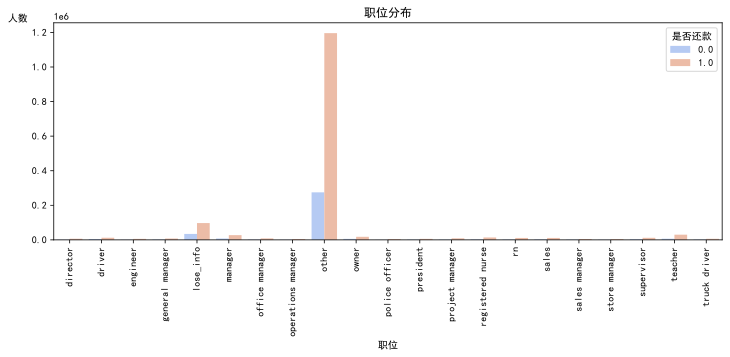

In [51]:
## 画图
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['职位'].unique())
sns.countplot(x='职位',data=df,order = subgrade_order,palette='coolwarm',hue="是否还款")
plt.title('职位分布')

# plt.title('贷款金额分布')
plt.ylabel("人数",rotation=360,loc="top")
plt.xticks(rotation=90)
plt.show()

### 7就业年限

In [52]:
df["就业年限"].fillna(value='0',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [53]:
df.loc[df["就业年限"].isnull(),"就业年限"]

Series([], Name: 就业年限, dtype: object)

In [54]:
adict = {
'10+ years':10,
'9 years':9,
'8 years':8,
'7 years':7,
'6 years':6,
'5 years':5,
'4 years':4,
'3 years':3,
'2 years':2,
'1 years':1,
'< 1 year':0.5,
'0':0
}
df["就业年限"] = df["就业年限"].map(adict)

<ipython-input-54-6e519c02fe09>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["就业年限"] = df["就业年限"].map(adict)


In [55]:
df["就业年限"].value_counts()

10.00    611330
2.00     168516
0.50     153700
3.00     149271
0.00     117196
5.00     115872
4.00     112211
6.00      85354
8.00      78646
7.00      78141
9.00      67170
Name: 就业年限, dtype: int64

In [56]:
df.loc[df["就业年限"].isnull(),"就业年限"]

4        NaN
18       NaN
24       NaN
37       NaN
38       NaN
          ..
105405   NaN
105419   NaN
105426   NaN
105435   NaN
105437   NaN
Name: 就业年限, Length: 122924, dtype: float64

In [57]:
df["就业年限"].fillna(value=0.0,inplace=True)
df["就业年限"].isnull().sum()

0

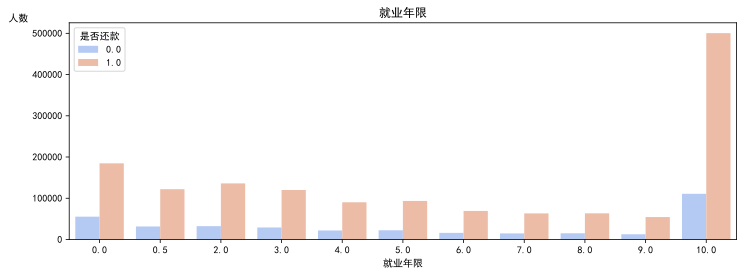

In [58]:
## 画图
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['就业年限'].unique())
sns.countplot(x='就业年限',data=df,order = subgrade_order,palette='coolwarm',hue="是否还款")
plt.title('就业年限')

# plt.title('贷款金额分布')
plt.ylabel("人数",rotation=360,loc="top")
# plt.xlabel("申请的贷款金额$")
plt.show()

### 8贷款目的

In [59]:
len(df["贷款目的"].value_counts())

14

In [60]:
print(df["贷款目的"].value_counts())
print(df["贷款名称"].value_counts())

debt_consolidation    1063459
credit_card            412844
home_improvement       123861
other                  113589
major_purchase          41750
medical                 22578
small_business          20515
car                     20215
vacation                13333
moving                  13203
house                   11099
wedding                  2298
renewable_energy         1260
educational               327
Name: 贷款目的, dtype: int64
Debt consolidation                          941169
Credit card refinancing                     366391
Home improvement                            111152
Other                                       102322
Major purchase                               36294
                                             ...  
Freedomin2011                                    1
Get our of debt                                  1
debt remover                                     1
Boat loan for 50% of the purchase price.         1
interest shaving                             

### 2float类型特征，连续型特征归一化

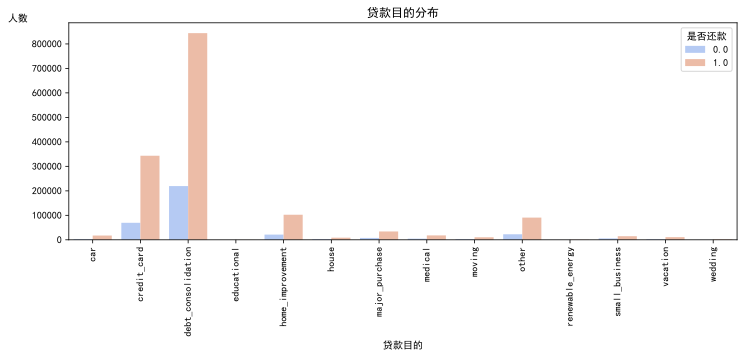

In [61]:
## 画图
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['贷款目的'].unique())
sns.countplot(x='贷款目的',data=df,order = subgrade_order,palette='coolwarm',hue="是否还款")
plt.title('贷款目的分布')

# plt.title('贷款金额分布')
plt.ylabel("人数",rotation=360,loc="top")
plt.xticks(rotation=90)
plt.show()

In [62]:
df.drop(["贷款名称"],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 10借款人最早信用报告开立的年份\贷款融资年份

In [63]:
df["借款人最早信用报告开立的年份"] = df["借款人最早报告的信用额度开立的月份"].apply(lambda x:int(x[-4:]))
df.drop(["借款人最早报告的信用额度开立的月份"],axis=1,inplace=True)
df["贷款融资的年份"] = df["贷款融资的月份"].apply(lambda x:int(x[-4:]))
df["贷款融资的年份"].value_counts()

<ipython-input-63-b467ba843a50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["借款人最早信用报告开立的年份"] = df["借款人最早报告的信用额度开立的月份"].apply(lambda x:int(x[-4:]))
<ipython-input-63-b467ba843a50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["贷款融资的年份"] = df["贷款融资的月份"].apply(lambda x:int(x[-4:]))


2016    403032
2015    402819
2017    314212
2014    235616
2018    197074
2013    134814
2019     75327
2012     53367
2011     21721
2010     11536
2009      4716
2020      4284
2008      1562
2007       251
Name: 贷款融资的年份, dtype: int64

In [64]:
df.loc[df["贷款融资的年份"].isnull(),"贷款融资的年份"]

Series([], Name: 贷款融资的年份, dtype: int64)

### 删除空值过多的特征1

In [65]:
def func_col_null_rate():
  a_series = df.isnull().sum()/len(df)
  adf = pd.DataFrame(a_series,columns=["缺失值占比"]).sort_values(by="缺失值占比")
  print(len(adf))
  return adf

In [66]:
def func_corr_adf():
  adf = func_col_null_rate()
  corr_df1 = pd.read_excel("./output/corr_df1.xlsx",index_col=0)
  corr_df2 = pd.read_excel("./output/corr_df2.xlsx",index_col=0)
  adf = pd.merge(adf,pd.DataFrame(corr_df1),left_index=True,right_index=True,how="left")
  adf = pd.merge(adf,pd.DataFrame(corr_df2),left_index=True,right_index=True,how="left")
  adf.columns = ['缺失值占比','pearson','spearman']  
  return adf

In [67]:
adf = func_corr_adf()
drop_columns_list = adf[adf["缺失值占比"]>=0.80].index

143


In [68]:
adf[(adf["缺失值占比"]<=0.99)&(adf["缺失值占比"]>=0.9)].tail(40)

,缺失值占比,pearson,spearman
共同借款人在登记期间提供的合并年收入,0.96,0.06,0.08
共同借款人的共同收入核实状况,0.96,NaN,NaN
次申请人申请时的未平仓交易数量,0.97,-0.02,-0.02
次申请人申请时当前活跃的分期付款交易数量,0.97,-0.01,-0.02
次申请人申请时的循环账户数量,0.97,0.01,0.01
次申请人申请时过去1年内的注销次数,0.97,-0.04,-0.05
过去1年内的托收数量,0.97,-0.06,-0.08
次申请人申请时最近6个月的信用查询,0.97,-0.12,-0.11
次申请人申请时的最早信用额度,0.97,NaN,NaN
次要申请人申请时的按揭户口数目,0.97,0.12,0.13


In [69]:
## ^使用中位数补全
# 所有交易的信用额度余额
# 过去1年的信用查询次数
# 循环交易笔数(1年内)
# 最近一次调查至今月数

In [70]:
# & 先运行完10
def df_col_print(name):
  print(df.loc[:,["贷款融资的年份",name]])
  print(df[name].value_counts())

In [71]:
df_col_print("循环交易笔数(2年内)")

        贷款融资的年份  循环交易笔数(2年内)
0          2011          NaN
1          2011          NaN
2          2011          NaN
3          2011          NaN
4          2011          NaN
...         ...          ...
105446     2017         5.00
105447     2017         3.00
105448     2017         9.00
105449     2017         0.00
105450     2017         0.00

[1860331 rows x 2 columns]
1.00     208432
2.00     193462
0.00     149762
3.00     149759
4.00     105399
5.00      71309
6.00      46712
7.00      30756
8.00      19649
9.00      12827
10.00      8464
11.00      5559
12.00      3469
13.00      2516
14.00      1745
15.00      1076
16.00       833
17.00       580
18.00       420
19.00       286
20.00       198
21.00       159
22.00       116
24.00        82
23.00        69
25.00        52
26.00        41
27.00        36
28.00        32
30.00        22
29.00        21
31.00        12
32.00         9
33.00         7
37.00         5
45.00         4
34.00         4
35.00         4
43.00         3


In [72]:
df.drop(drop_columns_list,axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


####   # 使用中位数补全该列的缺失值

In [73]:
def func_fillna_median(df,col):
  # 使用中位数补全该列的缺失值
  medi = df[col].median()
  df[col].fillna(value=medi,inplace=True)
  return

In [74]:

# 所有交易的信用额度余额
# 过去1年的信用查询次数
# 循环交易笔数(1年内)
# 最近一次调查至今月数

func_fillna_median(df,"所有交易的信用额度余额")
func_fillna_median(df,"过去1年的信用查询次数")
func_fillna_median(df,"循环交易笔数(1年内)")
func_fillna_median(df,"最近一次调查至今月数")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### 9贷款周期

In [75]:
print(df["贷款周期"].value_counts())
df["贷款周期"] = df["贷款周期"].apply(lambda x: int(x[1:3]))   ##剔除months

 36 months    1393299
 60 months     467032
Name: 贷款周期, dtype: int64


<ipython-input-75-c5c0aedfb952>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["贷款周期"] = df["贷款周期"].apply(lambda x: int(x[1:3]))   ##剔除months


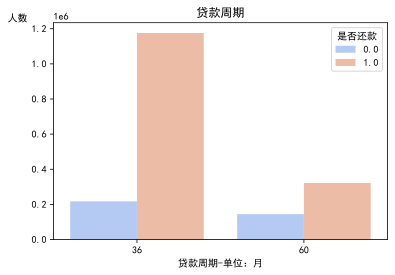

In [76]:
plt.figure(figsize=(6,4))
subgrade_order = sorted(df['贷款周期'].unique())
sns.countplot(x='贷款周期',data=df,order = subgrade_order,palette='coolwarm',hue="是否还款")
plt.title('贷款周期')
plt.ylabel("人数",rotation=360,loc="top")
plt.xlabel("贷款周期-单位：月")
plt.show()

### 删除空值过多的特征2

In [77]:
def func_col_null_df():
  adf = func_col_null_rate()
  corr_df1 = pd.read_excel("./output/corr_df1.xlsx",index_col=0)
  corr_df2 = pd.read_excel("./output/corr_df2.xlsx",index_col=0)
  adf = pd.merge(adf,pd.DataFrame(corr_df1),left_index=True,right_index=True,how="left")
  adf = pd.merge(adf,pd.DataFrame(corr_df2),left_index=True,right_index=True,how="left")
  adf.columns = ['缺失值占比','pearson','spearman']  
  return adf

In [78]:
adf = func_col_null_df()
drop_columns_list1 = adf[(adf["缺失值占比"]>=0.1)].index.tolist()  

117


In [79]:
def func_drop(df,col_list):
  df.drop(col_list,axis=1,inplace=True)
  return 

In [80]:
func_drop(df,drop_columns_list1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [81]:
adf = func_col_null_df()

102


In [82]:
adf.loc[(pd.isna(adf["pearson"])|pd.isna(adf["spearman"])),:].iloc[:,:].style.format({"缺失值占比":"{:.3%}"})

,缺失值占比,pearson,spearman
贷款ID,0.000%,nan,nan
征收回收费,0.000%,nan,nan
政策代码,0.000%,nan,nan
申请类型,0.000%,nan,nan
借款人最早信用报告开立的年份,0.000%,nan,nan
标记已注销的借款人是否与债务清偿公司合作,0.000%,nan,nan
是否有困难计划,0.000%,nan,nan
是否有共同借款人,0.000%,nan,nan
子评级(连续),0.000%,nan,nan
投资者出资总额的部分剩余未偿还本金,0.000%,nan,nan


In [83]:
df_col_print("是否制定还款计划")

        贷款融资的年份 是否制定还款计划
0          2011        n
1          2011        n
2          2011        n
3          2011        n
4          2011        n
...         ...      ...
105446     2017        n
105447     2017        n
105448     2017        n
105449     2017        n
105450     2017        n

[1860331 rows x 2 columns]
n    1860331
Name: 是否制定还款计划, dtype: int64


#### one_hot_columns_list、drop_columns_list2

In [84]:
one_hot_columns_list = ["申请类型",'标记已注销的借款人是否与债务清偿公司合作'
 ,'贷款初始状态',"房产权","收入来源是否已核实","借款人在贷款申请中提供的状态"]

drop_columns_list2 = ["贷款ID","政策代码","投资者出资总额的部分剩余未偿还本金","剩余未偿还本金总额"
                      ,"贷款融资的月份","是否制定还款计划","网址","借款人邮政编码前3个数字"]

In [85]:
df.drop(drop_columns_list2,axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 11贷款利率、循环额度利用率

In [86]:
df["贷款利率"] = df["贷款利率"].apply(lambda x:float(x.strip()[0:-1]))

<ipython-input-86-06d5025625c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["贷款利率"] = df["贷款利率"].apply(lambda x:float(x.strip()[0:-1]))


In [87]:
df.loc[df["贷款利率"].isnull(),"贷款利率"]

Series([], Name: 贷款利率, dtype: float64)

In [88]:
df["循环额度利用率"].fillna(value="0%",inplace=True)
df["循环额度利用率"] = df["循环额度利用率"].apply(lambda x:float(x.strip()[0:-1]))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-88-e49adac00d03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["循环额度利用率"] = df["循环额度利用率"].apply(lambda x:float(x.strip()[0:-1]))


In [89]:
df.loc[df["循环额度利用率"].isnull(),"循环额度利用率"]

Series([], Name: 循环额度利用率, dtype: float64)

### 13已收到上个月付款

In [90]:
df["已收到上个月付款"].fillna(value='2019',inplace=True)
df["已收到上个月付款"] = df["已收到上个月付款"].apply(lambda x:int(str(x)[-4:]))

<ipython-input-90-288b9fd2b50a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["已收到上个月付款"] = df["已收到上个月付款"].apply(lambda x:int(str(x)[-4:]))


In [91]:
df["已收到上个月付款"].value_counts()

2019    453376
2018    415128
2017    345476
2016    244889
2015    148382
2020    140775
2014     66558
2013     26841
2012     11366
2011      4996
2010      1848
2009       559
2008       137
Name: 已收到上个月付款, dtype: int64

In [92]:
df.loc[df["已收到上个月付款"].isnull(),"已收到上个月付款"]

Series([], Name: 已收到上个月付款, dtype: int64)

### 14最近一个月LC取消了这笔贷款的信贷

In [93]:
df["最近一个月LC取消了这笔贷款的信贷"].fillna(value="2020",inplace=True)
df["最近一个月LC取消了这笔贷款的信贷"] = df["最近一个月LC取消了这笔贷款的信贷"].apply(lambda x:int(str(x)[-4:]))

<ipython-input-93-1be5347be4d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["最近一个月LC取消了这笔贷款的信贷"] = df["最近一个月LC取消了这笔贷款的信贷"].apply(lambda x:int(str(x)[-4:]))


In [94]:
df["最近一个月LC取消了这笔贷款的信贷"].value_counts()

2020    844217
2019    476849
2018    242695
2017    156812
2016     92277
2015     25352
2014     11673
2013      5536
2012      2775
2011      1375
2010       544
2009       161
2007        33
2008        32
Name: 最近一个月LC取消了这笔贷款的信贷, dtype: int64

In [95]:
df.loc[df["最近一个月LC取消了这笔贷款的信贷"].isnull(),"最近一个月LC取消了这笔贷款的信贷"]

Series([], Name: 最近一个月LC取消了这笔贷款的信贷, dtype: int64)

### 15借款人在贷款申请中提供的状态、房产权

In [96]:
one_hot_columns_list

['申请类型',
 '标记已注销的借款人是否与债务清偿公司合作',
 '贷款初始状态',
 '房产权',
 '收入来源是否已核实',
 '借款人在贷款申请中提供的状态']

In [97]:
remain_state_list = df["借款人在贷款申请中提供的状态"].value_counts().head(40).index.tolist()
df.loc[~(df["借款人在贷款申请中提供的状态"].isin(remain_state_list)),"借款人在贷款申请中提供的状态"] = "others"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [98]:
df["借款人在贷款申请中提供的状态"].value_counts()

CA        264463
TX        152955
NY        150880
FL        133607
IL         72608
NJ         66965
PA         62757
OH         61139
GA         60576
NC         52050
VA         51916
MI         48649
AZ         45508
MD         43578
MA         42709
others     40611
CO         40492
WA         39937
MN         32964
IN         30724
MO         29718
TN         29088
CT         28158
NV         27859
WI         24828
AL         22798
OR         22551
SC         22478
LA         21067
KY         17913
OK         16959
KS         15485
AR         14082
UT         13462
NM         10028
MS          9928
NH          9048
HI          9046
RI          8191
WV          6551
NE          6005
Name: 借款人在贷款申请中提供的状态, dtype: int64

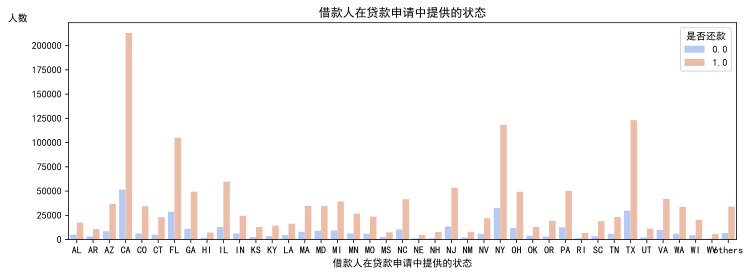

In [99]:
## 画图
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['借款人在贷款申请中提供的状态'].unique())
sns.countplot(x='借款人在贷款申请中提供的状态',data=df,order = subgrade_order,palette='coolwarm',hue="是否还款")
plt.title('借款人在贷款申请中提供的状态')

# plt.title('贷款金额分布')
plt.ylabel("人数",rotation=360,loc="top")
# plt.xlabel("申请的贷款金额$")
plt.show()

In [100]:
df["房产权"].value_counts()
remain_room_list = df["房产权"].value_counts().head(3).index.tolist()
df.loc[~(df["房产权"].isin(remain_room_list)),"房产权"] = "OTHERS"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [101]:
df["房产权"].value_counts()

MORTGAGE    918028
RENT        735358
OWN         205578
OTHERS        1367
Name: 房产权, dtype: int64

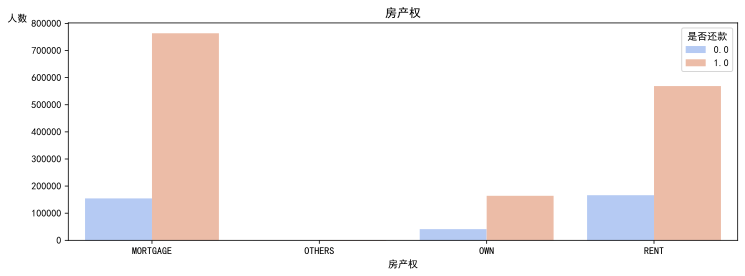

In [102]:
## 画图
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['房产权'].unique())
sns.countplot(x='房产权',data=df,order = subgrade_order,palette='coolwarm',hue="是否还款")
plt.title('房产权')

# plt.title('贷款金额分布')
plt.ylabel("人数",rotation=360,loc="top")
# plt.xlabel("申请的贷款金额$")
plt.show()

### 16标记借款人是否有困难计划

In [103]:
df["标记借款人是否有困难计划"].value_counts()

N    1849344
Y       1633
Name: 标记借款人是否有困难计划, dtype: int64

In [104]:
df["标记借款人是否有困难计划"].fillna(value="N",inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [105]:
df.loc[df["标记借款人是否有困难计划"].isnull(),"标记借款人是否有困难计划"]

Series([], Name: 标记借款人是否有困难计划, dtype: object)

### 17label列数字映射

In [106]:
df["贷款现状"].value_counts()

Fully Paid     1497783
Charged Off     362548
Name: 贷款现状, dtype: int64

In [107]:
target_dict = {
  'Fully Paid':1,
  'Charged Off':0
}
df["贷款现状"] = df["贷款现状"].map(target_dict)

<ipython-input-107-f1dd5dcf4910>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["贷款现状"] = df["贷款现状"].map(target_dict)


### 18缺失值的最终处理

In [108]:
adf = func_corr_adf()
adf.sort_values(by="缺失值占比",ascending=False).head(39).style.format({"缺失值占比":"{:.3%}"})

94


,缺失值占比,pearson,spearman
当前逾期120天的帐户数量,7.290%,-0.000445,-0.000281
开设最早的银行分期付款账户至今月数,6.511%,0.030217,0.032492
所有银行卡账户的当前总余额与高信用/信用额度的比率,3.696%,-0.054981,-0.055217
所有银行卡账户的百分比>限额的75%,3.665%,-0.054506,-0.055457
循环银行卡上的总开放购买,3.641%,0.074340,0.078848
从未拖欠的交易百分比,3.638%,0.008772,0.012141
所有账户的平均当前余额,3.632%,0.073881,0.077630
循环账户数,3.630%,0.004261,0.006297
最近一次循环账户开立后至今月数,3.630%,0.052175,0.060248
开设最早的循环账户至今月数,3.630%,0.052720,0.060691


In [109]:
def func_df_null_col(df,head):
  a = pd.DataFrame(df.isnull().sum(),columns=["缺失值"]).sort_values(by="缺失值",ascending=False).head(head)
  return a

In [110]:
null_col_df1 = func_df_null_col(df,head=39)
null_col_df1

,缺失值
当前逾期120天的帐户数量,135617
开设最早的银行分期付款账户至今月数,121130
所有银行卡账户的当前总余额与高信用/信用额度的比率,68755
所有银行卡账户的百分比>限额的75%,68180
循环银行卡上的总开放购买,67740
从未拖欠的交易百分比,67681
所有账户的平均当前余额,67572
最近一次循环账户开立后至今月数,67528
循环账户数,67528
开设最早的循环账户至今月数,67528


In [111]:
#测试
col_list = null_col_df1.index.tolist()
print(col_list)
for col in col_list:
    print(col,df[col].median())

['当前逾期120天的帐户数量', '开设最早的银行分期付款账户至今月数', '所有银行卡账户的当前总余额与高信用/信用额度的比率', '所有银行卡账户的百分比>限额的75%', '循环银行卡上的总开放购买', '从未拖欠的交易百分比', '所有账户的平均当前余额', '最近一次循环账户开立后至今月数', '循环账户数', '开设最早的循环账户至今月数', '最近一次开户后至今月数', '所有账户的当前总余额', '余额>0的循环交易数量', '分期账户数', '当前逾期30天的账户数量', '过去2年内逾期90天或以上的帐户数量', '过去1年开设的账户数量', 'total_rev_hi_lim', '银行卡账户数', '逾期120天或以上的账户数量', '当前活跃的循环交易数量', '总高信用/信用额度', '当前活跃的银行卡账户数量', '开设的循环账户数量', '总分期高信用/信用额度', '总收款金额', '最近一次开设银行卡账户后至今月数', '满意帐数', '正常的银行卡账户数', '抵押账户数量', '过去2年内开立的交易账户数量', '不包括抵押贷款的总信贷余额', '银行卡总信用额度/信用额度', '债务收入比', '公开记录的破产次数', '1年内的冲销次数', '1年内的收款数量', '税收留置权数量', '过去6个月的查询次数（不包括汽车和抵押贷款查询）']
当前逾期120天的帐户数量 0.0
开设最早的银行分期付款账户至今月数 129.0
所有银行卡账户的当前总余额与高信用/信用额度的比率 60.8
所有银行卡账户的百分比>限额的75% 40.0
循环银行卡上的总开放购买 5196.0
从未拖欠的交易百分比 98.6
所有账户的平均当前余额 7408.0
最近一次循环账户开立后至今月数 8.0
循环账户数 13.0
开设最早的循环账户至今月数 163.0
最近一次开户后至今月数 6.0
所有账户的当前总余额 80213.5
余额>0的循环交易数量 5.0
分期账户数 7.0
当前逾期30天的账户数量 0.0
过去2年内逾期90天或以上的帐户数量 0.0
过去1年开设的账户数量 2.0
total_rev_hi_lim 24800.0
银行卡账户数 7.0
逾期120天或以上的账户数量 0.0
当前活跃的循环交易数量 5.0
总高信用/信

#### 含有缺失值的特征全部为连续特征 使用中位数填充

In [112]:
## 使用中位数填充df
def func_fillna_median_all_df(df,adf):
  col_list = adf.index.tolist()
  for col in col_list:
    func_fillna_median(df,col)
  print("--------DataFrame各列中的缺失值已使用中位数填充完毕--------------")
  return 

In [113]:
func_fillna_median_all_df(df,null_col_df1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


--------DataFrame各列中的缺失值已使用中位数填充完毕--------------


In [114]:
null_col_df2 = func_df_null_col(df,head=10)
null_col_df2

,缺失值
申请的贷款金额,0
最近一次调查至今月数,0
余额>0的循环交易数量,0
循环账户数,0
开设的循环账户数量,0
分期账户数,0
银行卡账户数,0
正常的银行卡账户数,0
当前活跃的循环交易数量,0
当前活跃的银行卡账户数量,0


In [115]:
df.isnull().sum().sum()

0

In [116]:
df

,申请的贷款金额,在该时间点承诺用于该贷款的总金额,投资者在该时间点为该贷款承诺的总金额,贷款周期,贷款利率,分期金额,职位,就业年限,房产权,年收入,...,标记借款人是否有困难计划,由于困难计划，借款人预计支付少于合同每月付款金额的月份数,截至困难计划开始日期的最后一笔付款金额,标记已注销的借款人是否与债务清偿公司合作,是否还款,是否有困难计划,是否有共同借款人,子评级(连续),借款人最早信用报告开立的年份,贷款融资的年份
0,5000.00,5000.00,4975.00,36,10.65,162.87,lose_info,10.00,RENT,24000.00,...,N,0.00,0.00,N,1.00,0,0,7,1985,2011
1,2500.00,2500.00,2500.00,60,15.27,59.83,other,0.50,RENT,30000.00,...,N,0.00,0.00,N,0.00,0,0,14,1999,2011
2,2400.00,2400.00,2400.00,36,15.96,84.33,lose_info,10.00,RENT,12252.00,...,N,0.00,0.00,N,1.00,0,0,15,2001,2011
3,10000.00,10000.00,10000.00,36,13.49,339.31,other,10.00,RENT,49200.00,...,N,0.00,0.00,N,1.00,0,0,11,1996,2011
4,3000.00,3000.00,3000.00,60,12.69,67.79,other,0.00,RENT,80000.00,...,N,0.00,0.00,N,1.00,0,0,10,1996,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105446,24000.00,24000.00,24000.00,60,23.99,690.30,other,0.50,RENT,107000.00,...,N,0.00,0.00,N,0.00,0,0,22,1995,2017
105447,10000.00,10000.00,10000.00,36,7.99,313.32,rn,10.00,MORTGAGE,65000.00,...,N,0.00,0.00,N,1.00,0,0,5,1993,2017
105448,10050.00,10050.00,10050.00,36,16.99,358.26,other,8.00,RENT,37000.00,...,N,0.00,0.00,N,0.00,0,0,16,1993,2017
105449,6000.00,6000.00,6000.00,36,11.44,197.69,other,5.00,RENT,41000.00,...,N,0.00,0.00,N,1.00,0,0,9,1990,2017


### 19依据分类结果于业务背景删除掉不必要的特征项

In [117]:
drop_business_list = ["迄今为止收到的本金","至今偿还总额","至今偿还的直接融资金额","最后收到的总付款金额",
'投资者在该时间点为该贷款承诺的总金额','在该时间点承诺用于该贷款的总金额','冲销后回收金额',"已收到上个月付款"
,"至今缴纳利息","是否有困难计划","最近一个月LC取消了这笔贷款的信贷","截至困难计划开始日期的最后一笔付款金额"
,"借款人最后一次提取FICO所给评级下限","借款人最后一次提取FICO所给评级上限"
,"标记借款人是否有困难计划","标记已注销的借款人是否与债务清偿公司合作","征收回收费"]

In [118]:
print("-------删除前-------",len(df.columns))

df.drop(["是否还款"],axis=1,inplace=True)

print("要删除的因果混淆特征个数",len(drop_business_list))

df.drop(drop_business_list,axis=1,inplace=True)

print("-------删除后-------",len(df.columns))

-------删除前------- 94
要删除的因果混淆特征个数 17
-------删除后------- 76


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [119]:
df.isnull().sum().sum()

0

In [120]:
for i in df.columns:
  if i in drop_business_list:
    print(i)

### 20本地化存储 到clean_end_nature_data方便强模型直接预测

In [121]:
df.to_csv("./output/clean_end_nature_data0317.csv")

### 终止程序释放内存空间

In [122]:
del df
gc.collect()

17139

In [123]:
df = pd.read_csv("./output/clean_end_nature_data0317.csv",index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [124]:
df

,申请的贷款金额,贷款周期,贷款利率,分期金额,职位,就业年限,房产权,年收入,收入来源是否已核实,贷款现状,...,不包括抵押贷款的总信贷余额,银行卡总信用额度/信用额度,总分期高信用/信用额度,次申请人的FICO所给评级范围（高）,次申请人的FICO所给评级范围（低）,由于困难计划，借款人预计支付少于合同每月付款金额的月份数,是否有共同借款人,子评级(连续),借款人最早信用报告开立的年份,贷款融资的年份
0,5000.00,36,10.65,162.87,lose_info,10.00,RENT,24000.00,Verified,1,...,37615.00,15800.00,32399.00,0.00,0.00,0.00,0,7,1985,2011
1,2500.00,60,15.27,59.83,other,0.50,RENT,30000.00,Source Verified,0,...,37615.00,15800.00,32399.00,0.00,0.00,0.00,0,14,1999,2011
2,2400.00,36,15.96,84.33,lose_info,10.00,RENT,12252.00,Not Verified,1,...,37615.00,15800.00,32399.00,0.00,0.00,0.00,0,15,2001,2011
3,10000.00,36,13.49,339.31,other,10.00,RENT,49200.00,Source Verified,1,...,37615.00,15800.00,32399.00,0.00,0.00,0.00,0,11,1996,2011
4,3000.00,60,12.69,67.79,other,0.00,RENT,80000.00,Source Verified,1,...,37615.00,15800.00,32399.00,0.00,0.00,0.00,0,10,1996,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105446,24000.00,60,23.99,690.30,other,0.50,RENT,107000.00,Source Verified,0,...,60812.00,28200.00,64422.00,0.00,0.00,0.00,0,22,1995,2017
105447,10000.00,36,7.99,313.32,rn,10.00,MORTGAGE,65000.00,Source Verified,1,...,55863.00,34800.00,70203.00,0.00,0.00,0.00,0,5,1993,2017
105448,10050.00,36,16.99,358.26,other,8.00,RENT,37000.00,Not Verified,0,...,14300.00,9000.00,0.00,0.00,0.00,0.00,0,16,1993,2017
105449,6000.00,36,11.44,197.69,other,5.00,RENT,41000.00,Source Verified,1,...,26201.00,8100.00,34076.00,0.00,0.00,0.00,0,9,1990,2017


In [125]:
df.isnull().sum().sum()

0

## 归一化与one-hot

### 1将连续型特征的列名取出来

In [126]:
scale_feature_list = df.select_dtypes(exclude=["category", "object"]).columns.tolist()
#### 保留target列
scale_feature_list.remove("贷款现状")
print(len(scale_feature_list))

68


In [127]:
print(len(scale_feature_list))

68


In [128]:
import json  
print(len(scale_feature_list))
filename = './output/scale_feature_list.json'  #文件路径   一般文件对象类型为json文件
with open(filename, 'w') as f_obj:#打开模式为可写
	json.dump(scale_feature_list, f_obj)  #存储文件

68


In [129]:
import json  

filename = './output/scale_feature_list.json'  #文件路径   一般文件对象类型为json文件
with open(filename) as f_obj:  
  scale_feature_list = json.load(f_obj)
print(len(scale_feature_list))

68


In [130]:
from sklearn import preprocessing as pp
df.loc[:,scale_feature_list] = pp.scale(df.loc[:,scale_feature_list])

In [131]:
gc.collect()

15

### 2category特征 one-hot化

In [132]:
one_hot_col_list = df.select_dtypes(include=["category", "object"]).columns.tolist()
print(len(one_hot_col_list))

7


In [133]:
one_hot_col_list

['职位', '房产权', '收入来源是否已核实', '贷款目的', '借款人在贷款申请中提供的状态', '贷款初始状态', '申请类型']

In [134]:
df = pd.get_dummies(df,columns=one_hot_col_list)
df

,申请的贷款金额,贷款周期,贷款利率,分期金额,就业年限,年收入,贷款现状,债务收入比,过去2年借款人信用档案中逾期30天以上的逾期发生次数,借款人在贷款发起时FICO所给评级下限,...,借款人在贷款申请中提供的状态_UT,借款人在贷款申请中提供的状态_VA,借款人在贷款申请中提供的状态_WA,借款人在贷款申请中提供的状态_WI,借款人在贷款申请中提供的状态_WV,借款人在贷款申请中提供的状态_others,贷款初始状态_f,贷款初始状态_w,申请类型_Individual,申请类型_Joint App
0,-1.07,-0.58,-0.52,-1.04,1.15,-0.45,1,0.69,-0.36,1.14,...,0,0,0,0,0,0,1,0,1,0
1,-1.35,1.73,0.43,-1.43,-1.29,-0.40,0,-1.34,-0.36,1.29,...,0,0,0,0,0,0,1,0,1,0
2,-1.36,-0.58,0.58,-1.33,1.15,-0.55,1,-0.75,-0.36,1.14,...,0,0,0,0,0,0,1,0,1,0
3,-0.51,-0.58,0.07,-0.38,1.15,-0.24,1,0.11,-0.36,-0.23,...,0,0,0,0,0,0,1,0,1,0
4,-1.29,1.73,-0.10,-1.40,-1.42,0.02,1,-0.05,-0.36,-0.08,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105446,1.05,1.73,2.24,0.94,-1.29,0.25,0,-0.53,3.07,-0.85,...,0,0,0,0,0,0,1,0,1,0
105447,-0.51,-0.58,-1.07,-0.48,1.15,-0.10,1,0.08,0.78,0.84,...,0,0,0,0,0,0,0,1,1,0
105448,-0.51,-0.58,0.79,-0.31,0.63,-0.34,0,0.15,-0.36,0.22,...,0,1,0,0,0,0,0,1,1,0
105449,-0.96,-0.58,-0.36,-0.91,-0.14,-0.31,1,0.11,0.78,-0.85,...,0,0,0,0,0,0,0,1,1,0


In [135]:
df.iloc[106031,140:]

借款人在贷款申请中提供的状态_OR       0.00
借款人在贷款申请中提供的状态_PA       0.00
借款人在贷款申请中提供的状态_RI       0.00
借款人在贷款申请中提供的状态_SC       0.00
借款人在贷款申请中提供的状态_TN       0.00
借款人在贷款申请中提供的状态_TX       0.00
借款人在贷款申请中提供的状态_UT       0.00
借款人在贷款申请中提供的状态_VA       0.00
借款人在贷款申请中提供的状态_WA       0.00
借款人在贷款申请中提供的状态_WI       0.00
借款人在贷款申请中提供的状态_WV       0.00
借款人在贷款申请中提供的状态_others   0.00
贷款初始状态_f                0.00
贷款初始状态_w                1.00
申请类型_Individual         1.00
申请类型_Joint App          0.00
Name: 66245, dtype: float64

In [136]:
df.shape

(1860331, 156)

In [137]:
df.isnull().sum().sum()

0

## 本地存储持久化

In [138]:
df.to_csv("./output/scale_one_hot_end_data_0317.csv")

In [139]:
del df
gc.collect()

15

In [140]:
df = pd.read_csv("./output/scale_one_hot_end_data_0317.csv",index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [141]:
df

,申请的贷款金额,贷款周期,贷款利率,分期金额,就业年限,年收入,贷款现状,债务收入比,过去2年借款人信用档案中逾期30天以上的逾期发生次数,借款人在贷款发起时FICO所给评级下限,...,借款人在贷款申请中提供的状态_UT,借款人在贷款申请中提供的状态_VA,借款人在贷款申请中提供的状态_WA,借款人在贷款申请中提供的状态_WI,借款人在贷款申请中提供的状态_WV,借款人在贷款申请中提供的状态_others,贷款初始状态_f,贷款初始状态_w,申请类型_Individual,申请类型_Joint App
0,-1.07,-0.58,-0.52,-1.04,1.15,-0.45,1,0.69,-0.36,1.14,...,0,0,0,0,0,0,1,0,1,0
1,-1.35,1.73,0.43,-1.43,-1.29,-0.40,0,-1.34,-0.36,1.29,...,0,0,0,0,0,0,1,0,1,0
2,-1.36,-0.58,0.58,-1.33,1.15,-0.55,1,-0.75,-0.36,1.14,...,0,0,0,0,0,0,1,0,1,0
3,-0.51,-0.58,0.07,-0.38,1.15,-0.24,1,0.11,-0.36,-0.23,...,0,0,0,0,0,0,1,0,1,0
4,-1.29,1.73,-0.10,-1.40,-1.42,0.02,1,-0.05,-0.36,-0.08,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105446,1.05,1.73,2.24,0.94,-1.29,0.25,0,-0.53,3.07,-0.85,...,0,0,0,0,0,0,1,0,1,0
105447,-0.51,-0.58,-1.07,-0.48,1.15,-0.10,1,0.08,0.78,0.84,...,0,0,0,0,0,0,0,1,1,0
105448,-0.51,-0.58,0.79,-0.31,0.63,-0.34,0,0.15,-0.36,0.22,...,0,1,0,0,0,0,0,1,1,0
105449,-0.96,-0.58,-0.36,-0.91,-0.14,-0.31,1,0.11,0.78,-0.85,...,0,0,0,0,0,0,0,1,1,0


In [142]:
df.isnull().sum().sum()

0

### 3生成label与切分样本

In [143]:
x_data = df.drop(["贷款现状"],axis=1)
y_data = df["贷款现状"]

In [144]:
x_train,x_test,y_trian,y_test = train_test_split(x_data,y_data,test_size=0.2,stratify=y_data,random_state=2022)

In [145]:
print(len(x_train),len(y_trian))
print(len(x_test),len(y_test))

1488264 1488264
372067 372067


In [146]:
x_test.to_csv("./output/x_test.csv")
y_test.to_csv("./output/y_test.csv")
x_train.to_csv("./data/x_train.csv")
y_trian.to_csv("./data/y_trian.csv")

In [147]:
del x_data,y_data,df,x_test,y_test
gc.collect()

15

### 4样本平衡化

In [148]:
y_trian.value_counts()

1    1198226
0     290038
Name: 贷款现状, dtype: int64

In [149]:
from imblearn.over_sampling import BorderlineSMOTE
bordersmote = BorderlineSMOTE(random_state=2022,kind="borderline-2",n_jobs=-1)
x_train_resample,y_trian_resample = bordersmote.fit_resample(x_train,y_trian)

### 5训练集样本平衡后的持久化存储

In [150]:
del x_train,y_trian
gc.collect()

1719

In [151]:
x_train_resample.to_csv("./output/x_train_resample.csv")
y_trian_resample.to_csv("./output/y_trian_resample.csv")

In [152]:
x_train_resample = pd.read_csv("./output/x_train_resample.csv",index_col=0)
y_trian_resample = pd.read_csv("./output/y_trian_resample.csv",index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [153]:
x_test = pd.read_csv("./output/x_test.csv",index_col=0)
y_test = pd.read_csv("./output/y_test.csv",index_col=0)

## 模型训练

In [228]:
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,roc_curve,auc
def print_classreport_matrix(true, pred, tag=None):
    if tag=="train":
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("train训练集验证结果:\n================================================")
        print("_______________________________________________")
        print(f"分类报告:\n{clf_report}")
        print("_______________________________________________")
        print(f"混淆矩阵: \n {confusion_matrix(true, pred)}\n")
        
    elif tag=="test":
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("test训练集验证结果:\n================================================")
        print("_______________________________________________")
        print(f"分类报告:\n{clf_report}")
        print("_______________________________________________")
        print(f"混淆矩阵: \n {confusion_matrix(true, pred)}\n")
    else:
        print("tag输入错误，请重新输入:\n================================================")    

In [225]:
def print_roc_auc_score(model,x_test,y_test,model_name):
  proba_y = model.predict_proba(x_test)[:,1]
  print("roc_auc_sroce: ",roc_auc_score(y_test,proba_y))

  fpr_keras,tpr_keras,thresholds= roc_curve(y_test,proba_y)
  print ('KS:',max(tpr_keras-fpr_keras))
  print("roc_auc_sroce: ",roc_auc_score(y_test, proba_y))
    
  auc_keras = auc(fpr_keras, tpr_keras)
  print("auc: ",auc_keras)
  
  
  plt.figure(figsize=(10,6))
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_keras, tpr_keras, label=model_name +'  (auc = {:.3f})'.format(auc_keras))
  # plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()

In [156]:
from sklearn.metrics import roc_curve
def print_ks_score(model,x_test,y_test):
  y_proba = model.predict_proba(x_test)[:,1]
  fpr,tpr,thresholds= roc_curve(np.array(y_test),y_proba)
  print ('KS:',max(tpr-fpr))

In [226]:
def func_all_print_score(model,x_test,y_test,model_name):
  print_classreport_matrix(y_test,model.predict(x_test),tag="test")
  print_roc_auc_score(model,x_test,y_test,model_name)
  print_ks_score(model,x_test,y_test)
  print("f1 score:",f1_score(y_test,model.predict(x_test),average="binary"))

In [158]:
# y_trian_resample.value_counts()
# x_train_resample

In [159]:
# print(x_train_resample.isnull().sum().sum())
# print(x_test.isnull().sum().sum())
# print(y_trian_resample.isnull().sum().sum())
# print(y_test.isnull().sum().sum())
# print(y_trian_resample.value_counts())
# print(y_test.value_counts())

### 1逻辑回归

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state=2022,n_jobs=-1,penalty="l2",max_iter=50,C=1)  #solver="saga"

# lr_param_grid = {
#     "random_state":[1]
#     ,"penalty":['l1', 'l2']
#     ,'tol' : [1e-3]
#     ,'solver' :['liblinear']
# }


# lr = GridSearchCV(
#     LogisticRegression(),lr_param_grid,cv=3)  #使用3折交叉验证

lr.fit(x_train_resample,y_trian_resample)
# lr.fit(x_train,y_trian)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=1000000.0, max_iter=1, n_jobs=-1, random_state=2022)

In [183]:
import joblib
# Save to file in the current working directory
# 保存模型
joblib.dump(lr,"./output/logistic_resample.pkl")

['./output/logistic_resample.pkl']

In [208]:
lr = joblib.load("./output/logistic_resample.pkl")

test训练集验证结果:
_______________________________________________
分类报告:
                 0         1  accuracy  macro avg  weighted avg
precision     0.30      0.88      0.64       0.59          0.77
recall        0.66      0.63      0.64       0.65          0.64
f1-score      0.41      0.74      0.64       0.58          0.67
support   72510.00 299557.00      0.64  372067.00     372067.00
_______________________________________________
混淆矩阵: 
 [[ 47683  24827]
 [110034 189523]]

roc_auc_sroce:  0.6994772558474198
KS: 0.2906585888311651
roc_auc_sroce:  0.6994772558474198
auc:  0.6994772558474198


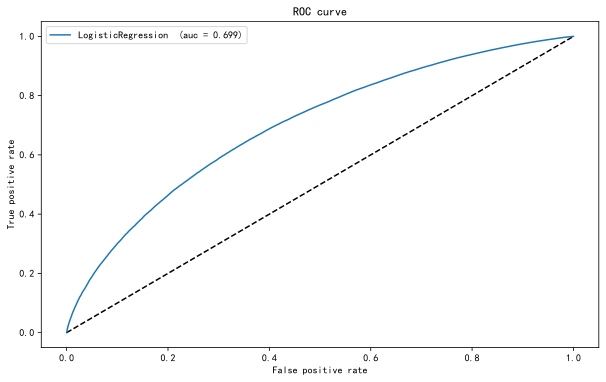

KS: 0.2906585888311651
f1 score: 0.7375770324202628


,precision,recall,f1-score,support
0,30.23%,65.76%,0.4142,72510.000000
1,88.42%,63.27%,0.7376,299557.000000


In [253]:
func_all_print_score(lr,x_test,y_test,"LogisticRegression")
pd.DataFrame(classification_report(y_test, lr.predict(x_test), output_dict=True)).iloc[:,:2].T.style.format(
  {"precision":"{:.2%}","recall":"{:.2%}","f1-score":"{:.4f}"})

In [254]:
def func_lr_coef(lr,x_train):  
  alist = []
  name_list = []
  for i in range(len(lr.coef_.tolist()[0])):
    name_list.append(x_train.columns[i])
    alist.append(lr.coef_.tolist()[0][i])
  adict = {}
  adict["特征名"] = name_list
  adict["系数"] = alist
  return pd.DataFrame(adict).sort_values(by="系数",ascending=False)

In [186]:
adf = func_lr_coef(lr,x_test)
adf.head(50)

,特征名,系数
93,收入来源是否已核实_Not Verified,14.48
94,收入来源是否已核实_Source Verified,14.43
95,收入来源是否已核实_Verified,14.43
89,房产权_MORTGAGE,10.06
151,贷款初始状态_f,9.99
152,贷款初始状态_w,9.98
91,房产权_OWN,9.91
92,房产权_RENT,9.77
132,借款人在贷款申请中提供的状态_NH,6.26
145,借款人在贷款申请中提供的状态_UT,6.07


In [187]:
adf.tail(50)

,特征名,系数
20,总收款金额,0.03
44,分期账户数,0.03
32,开设最早的银行分期付款账户至今月数,0.02
51,过去2年内逾期90天或以上的帐户数量,0.02
35,最近一次开户后至今月数,0.01
29,所有银行卡账户的当前总余额与高信用/信用额度的比率,0.01
49,当前逾期120天的帐户数量,0.01
47,余额>0的循环交易数量,0.01
34,最近一次循环账户开立后至今月数,0.01
19,逾期账户数量,0.01


### 2随机森林

In [169]:
from sklearn.ensemble import RandomForestClassifier
#使用网格搜索
rf_param_grid = {
    "random_state":[1],
    "bootstrap":[True],
    "min_samples_split":[3],
    "max_samples":[0.6,0.7,0.8],
    "n_estimators":[8,9,10]
}

rf = GridSearchCV(RandomForestClassifier(),param_grid=rf_param_grid,cv=3)
rf.fit(x_train_resample,y_trian_resample)
print(rf.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

RandomForestClassifier(max_samples=0.8, min_samples_split=3, n_estimators=9,
                       random_state=1)


In [170]:
import joblib
# Save to file in the current working directory
# 保存模型
joblib.dump(rf,"./output/random_forest_resample.pkl")

['./output/random_forest_resample.pkl']

test训练集验证结果:
_______________________________________________
分类报告:
                 0         1  accuracy  macro avg  weighted avg
precision     0.41      0.84      0.78       0.62          0.75
recall        0.27      0.91      0.78       0.59          0.78
f1-score      0.33      0.87      0.78       0.60          0.76
support   72510.00 299557.00      0.78  372067.00     372067.00
_______________________________________________
混淆矩阵: 
 [[ 19794  52716]
 [ 28291 271266]]

roc_auc_sroce:  0.6823182707548802
KS: 0.2659469936889158
roc_auc_sroce:  0.6823182707548802
auc:  0.6823182707548802


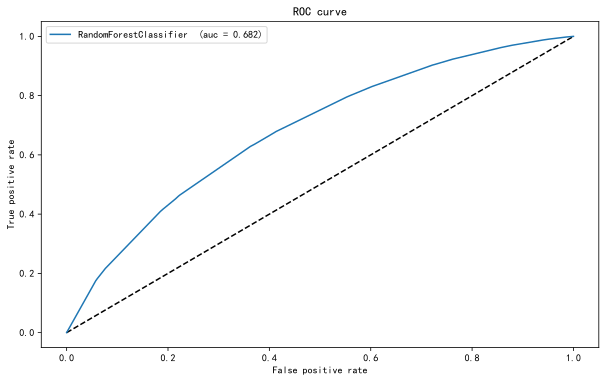

KS: 0.2659469936889158
f1 score: 0.8700851109553692


,precision,recall,f1-score,support
0,41.16%,27.30%,0.3283,72510.000000
1,83.73%,90.56%,0.8701,299557.000000


In [230]:
func_all_print_score(rf,x_test,y_test,"RandomForestClassifier")
pd.DataFrame(classification_report(y_test, rf.predict(x_test), output_dict=True)).iloc[:,:2].T.style.format(
  {"precision":"{:.2%}","recall":"{:.2%}","f1-score":"{:.4f}"})

### 3XGBoost

In [172]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(
    n_estimators=10000
    ,min_child_weight=3
    ,learning_rate=0.3
    ,subsample=0.6
    ,colsample_bytree=0.6
    ,random_state=1
    ,objective='binary:logistic'
    ,early_stopping_rounds=50
    ,n_jobs=-1)

In [173]:
xgb.fit(x_train_resample,y_trian_resample)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[05:36:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=50, enable_categorical=False, gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

test训练集验证结果:
_______________________________________________
分类报告:
                 0         1  accuracy  macro avg  weighted avg
precision     0.46      0.84      0.80       0.65          0.77
recall        0.26      0.93      0.80       0.59          0.80
f1-score      0.33      0.88      0.80       0.61          0.77
support   72510.00 299557.00      0.80  372067.00     372067.00
_______________________________________________
混淆矩阵: 
 [[ 18953  53557]
 [ 21851 277706]]

roc_auc_sroce:  0.7067397147356669
KS: 0.2973718097483893
roc_auc_sroce:  0.7067397147356669
auc:  0.7067397147356669


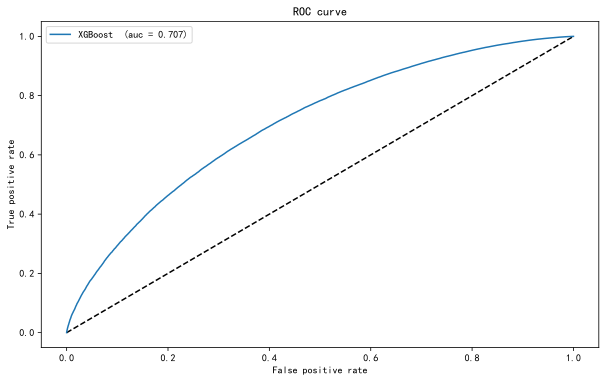

KS: 0.2973718097483893
f1 score: 0.8804603531910847


,precision,recall,f1-score,support
0,46.45%,26.14%,0.3345,72510.000000
1,83.83%,92.71%,0.8805,299557.000000


In [231]:
func_all_print_score(xgb,x_test,y_test,"XGBoost")
pd.DataFrame(classification_report(y_test, xgb.predict(x_test), output_dict=True)).iloc[:,:2].T.style.format(
  {"precision":"{:.2%}","recall":"{:.2%}","f1-score":"{:.4f}"})

In [197]:
import joblib
# Save to file in the current working directory
# 保存模型
joblib.dump(xgb,"./output/xgboost_resample.pkl")

['./output/xgboost_resample.pkl']

In [198]:
xgb = joblib.load("./output/xgboost_resample.pkl")

In [176]:
def func_xgb_feature_importance(xgb,x_train):  
  alist = []
  name_list = []
  for i in range(len(xgb.feature_importances_)):
    name_list.append(x_train.columns[i])
    alist.append(xgb.feature_importances_[i])
  adict = {}
  adict["特征名"] = name_list
  adict["feature_importance"] = alist
  return pd.DataFrame(adict).sort_values(by="feature_importance",ascending=False)

In [177]:
adf = func_xgb_feature_importance(xgb,x_train_resample)
adf.iloc[1:50,:]

,特征名,feature_importance
93,收入来源是否已核实_Not Verified,0.06
152,贷款初始状态_w,0.06
92,房产权_RENT,0.06
65,子评级(连续),0.04
89,房产权_MORTGAGE,0.04
10,过去6个月的查询次数（不包括汽车和抵押贷款查询）,0.03
16,至今缴纳滞纳金,0.03
94,收入来源是否已核实_Source Verified,0.02
91,房产权_OWN,0.02
151,贷款初始状态_f,0.02


In [178]:
adf.tail(50)

,特征名,feature_importance
21,所有账户的当前总余额,0.00
71,职位_general manager,0.00
30,1年内的冲销次数,0.00
135,借款人在贷款申请中提供的状态_NV,0.00
27,所有账户的平均当前余额,0.00
134,借款人在贷款申请中提供的状态_NM,0.00
60,总分期高信用/信用额度,0.00
58,不包括抵押贷款的总信贷余额,0.00
125,借款人在贷款申请中提供的状态_MD,0.00
111,借款人在贷款申请中提供的状态_AR,0.00
